In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

# Prepare

In [2]:
# Data
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Model

In [3]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

# Predict

In [5]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

# Model Tuning

In [10]:
rf_params = {"max_depth": list(range(1,10)),
             "max_features":[3,5,10,15],
             "n_estimators": [100, 200, 500, 1000, 2000]}

rf_model = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs = -1).fit(X_train, y_train)

### Tuned Model

In [15]:
list=pd.Series(rf_cv_model.best_params_)
rf_tuned = RandomForestRegressor(random_state=42, max_depth=list[0], max_features=list[1], n_estimators=list[2]).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.26700632831245

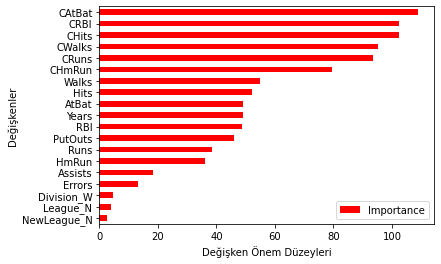

In [23]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*1000},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");
plt.ylabel("Değişkenler");